In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cluster.csv')
df

,Name,Age,income
0,rob,27,70000
1,micheal,29,90000
2,mohan,29,61000
3,ismail,28,60000
4,kory,42,150000
5,gautam,39,150000
6,david,41,160000
7,andrea,38,162000
8,brad,36,156000
9,angelina,35,130000


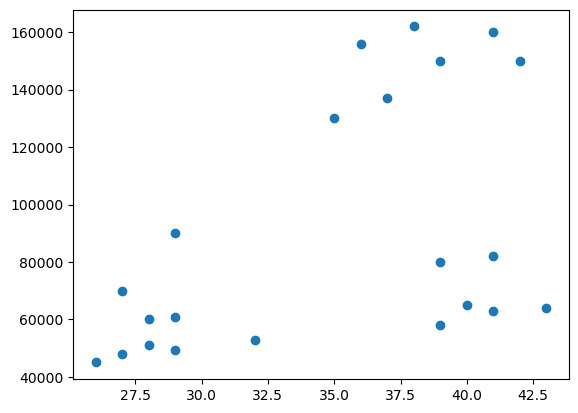

In [7]:
plt.scatter(df['Age'], df['income'])

In [8]:
from sklearn.cluster import KMeans

In [10]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
num = km.fit_predict(df[['Age', 'income']])

In [14]:
df['cluster'] = num

In [39]:
df0 = df[df['cluster_again']== 0]
df1 = df[df['cluster_again']== 1]
df2 = df[df['cluster_again']== 2]

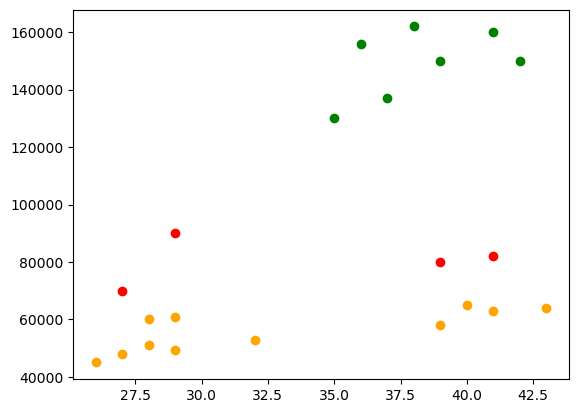

In [21]:
plt.scatter(df0['Age'], df0['income'], color='red')
plt.scatter(df1['Age'], df1['income'], color='green')
plt.scatter(df2['Age'], df2['income'], color='orange')

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [29]:
df['income_original'] = df['income']

In [31]:
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

In [32]:
df

,Name,Age,income,cluster,income_original
0,rob,0.058824,0.213675,0,70000
1,micheal,0.176471,0.384615,0,90000
2,mohan,0.176471,0.136752,2,61000
3,ismail,0.117647,0.128205,2,60000
4,kory,0.941176,0.897436,1,150000
5,gautam,0.764706,0.897436,1,150000
6,david,0.882353,0.982906,1,160000
7,andrea,0.705882,1.000000,1,162000
8,brad,0.588235,0.948718,1,156000
9,angelina,0.529412,0.726496,1,130000


In [33]:
km = KMeans(n_clusters=3)

In [35]:
kn_num = km.fit_predict(df[['Age', 'income']])

In [36]:
df['cluster_again'] = kn_num

In [37]:
df

,Name,Age,income,cluster,income_original,cluster_again
0,rob,0.058824,0.213675,0,70000,0
1,micheal,0.176471,0.384615,0,90000,0
2,mohan,0.176471,0.136752,2,61000,0
3,ismail,0.117647,0.128205,2,60000,0
4,kory,0.941176,0.897436,1,150000,1
5,gautam,0.764706,0.897436,1,150000,1
6,david,0.882353,0.982906,1,160000,1
7,andrea,0.705882,1.000000,1,162000,1
8,brad,0.588235,0.948718,1,156000,1
9,angelina,0.529412,0.726496,1,130000,1


In [44]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.89133089],
       [0.85294118, 0.2022792 ]])

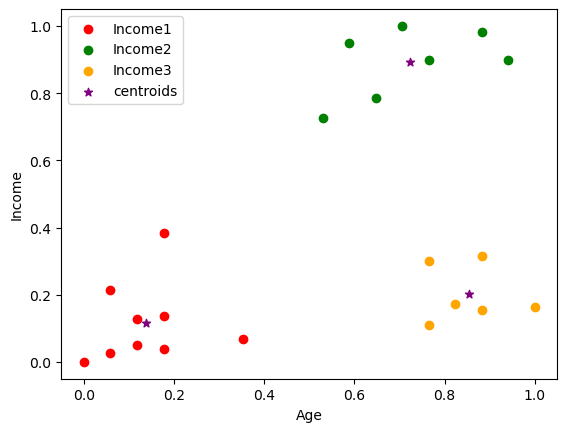

In [45]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(df0['Age'], df0['income'], color='red', label='Income1')
plt.scatter(df1['Age'], df1['income'], color='green', label='Income2')
plt.scatter(df2['Age'], df2['income'], color='orange', label='Income3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroids')
plt.legend()

In [51]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'income']])
    sse.append(km.inertia_)

C:\Users\grainstudio\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


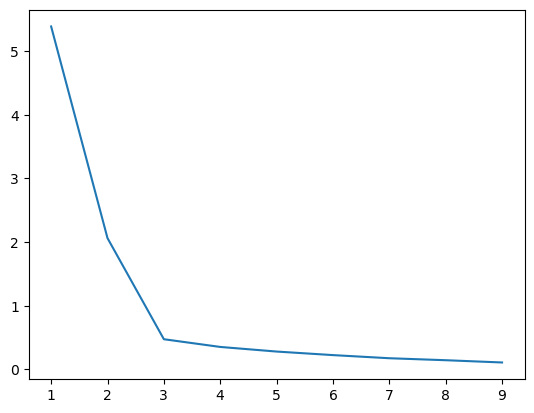

In [53]:
plt.plot(k_rng, sse)